In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy.constants import k as k_B
from scipy.constants import N_A
import seaborn as sns

In [2]:
filenm = 'AA/COLVAR'
with open(filenm) as f:
    #Read the first line
    line = f.readline()
    header=line.split()[2:]

AA = pd.read_csv(filenm, sep=' ', comment='#', names=header).set_index('time')
AA['phi'] = AA['phi'].apply(lambda x: x - 2*np.pi if x > 1 else x)
AA['psi'] = AA['psi'].apply(lambda x: x - 2*np.pi if x > 1 else x)
AA['phi_CG'] = AA['phi_CG'].apply(lambda x: x - 2*np.pi if x > 1 else x)
AA.head()

,phi,psi,phi_CG,psi_CG,theta,theta_CG,alpha_CG
time,,,,,,,
0.000,0.042920,-0.103217,-0.654552,1.966345,-2.821966,-2.842121,1.782013
0.002,0.066403,-0.133494,-0.651764,1.959111,-2.845553,-2.846252,1.781724
0.004,0.088199,-0.164540,-0.648514,1.954772,-2.869524,-2.849397,1.780768
0.006,0.104695,-0.194607,-0.644487,1.953258,-2.889442,-2.851496,1.778537
0.008,0.112742,-0.221253,-0.639501,1.953959,-2.901625,-2.852601,1.774743


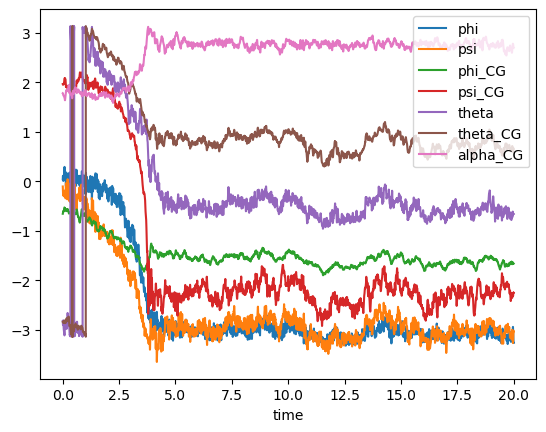

time
19.992    2.703261
19.994    2.700378
19.996    2.699095
19.998    2.698773
20.000    2.698835
Name: alpha_CG, dtype: float64 time
0.000    1.782013
0.002    1.781724
0.004    1.780768
0.006    1.778537
0.008    1.774743
Name: alpha_CG, dtype: float64


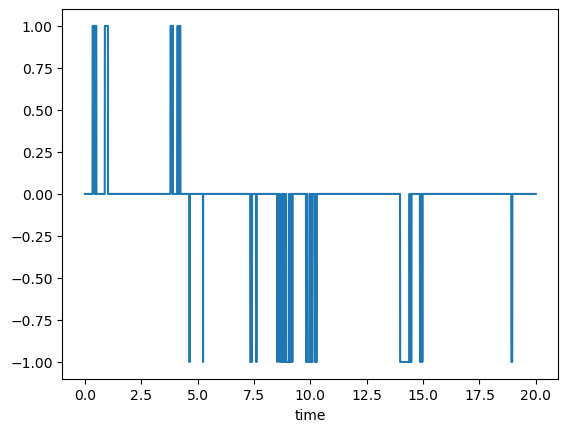

In [3]:
AA.plot(kind='line')
plt.show()
AA['I1'] = (AA['theta'] > 0).apply(int)
AA['I1_CG'] = (AA['theta_CG'] > 1).apply(int)
(AA.I1 - AA.I1_CG).plot(kind='line')
print(AA.alpha_CG.tail(), AA.alpha_CG.head())

In [29]:
filenm = 'CG/COLVAR'
with open(filenm) as f:
    #Read the first line
    line = f.readline()
    header=line.split()[2:]

CG = pd.read_csv(filenm, sep=' ', comment='#', names=header).set_index('time')
CG.alpha2 = CG.alpha2.apply(lambda x: x + 2*np.pi if x < 0 else x)
CG.gamma2 = CG.gamma2.apply(lambda x: x + 2*np.pi if x < 0 else x)
def assign_type(row):
    return "A" if row.dist_A < row.dist_B and row.dist_A < row.dist_I1 else "I1" if row.dist_I1 < row.dist_B else "B"
CG['type'] = CG.apply(assign_type, axis=1)
CG.head()

,gamma,gamma2,alpha,beta,alpha2,beta2,dist_A,dist_I1,dist_B,type
time,,,,,,,,,,
0.00,-1.896850,3.987517,0.501327,-1.361168,0.511234,-1.017852,0.062284,0.249118,0.271178,A
0.02,-1.924064,3.983551,0.493540,-1.377328,0.493844,-1.031782,0.061643,0.250119,0.272263,A
0.04,-1.934131,3.964376,0.469768,-1.380619,0.462465,-1.031662,0.060702,0.251249,0.273434,A
0.06,-1.935429,3.930362,0.433951,-1.379252,0.416984,-1.023800,0.059926,0.252666,0.274880,A
0.08,-1.936053,3.888396,0.397040,-1.383688,0.366890,-1.017566,0.059797,0.254222,0.276511,A


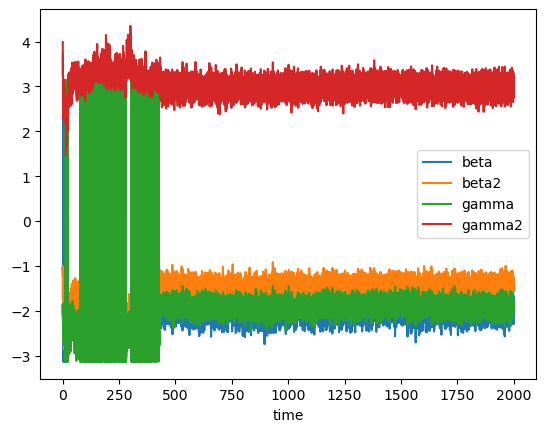

<Axes: xlabel='time'>

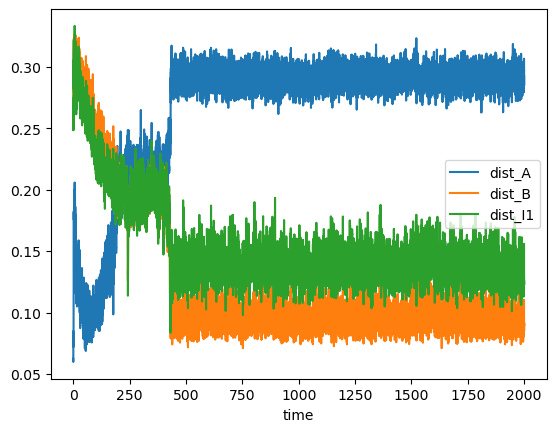

In [30]:
CG.plot(y=['beta','beta2','gamma','gamma2'])
plt.show()
CG.plot(y=['dist_A','dist_B','dist_I1'])

In [31]:
sns.kdeplot(data=CG, x='phi', y='psi', hue='type')

ValueError: Could not interpret value `phi` for parameter `x`

<Axes: xlabel='psi', ylabel='theta'>

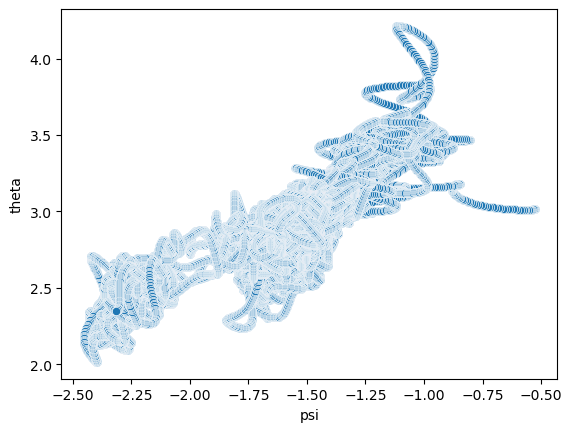

In [18]:
sns.scatterplot(data=CG, x='psi',y='theta')